In [1]:
import sys
sys.path.append('../../')

import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

import plots
from packages import general, bh

In [2]:
num_particles = 1000

thetas = np.linspace(0, 0.6, 7)

terms = 3

In [3]:
particles = [general.Particle(mass_like=True) for _ in range(num_particles)]

times = []

for theta in thetas:
    print(f'Theta: {theta}')
    method = bh.BH(particles, theta, terms)
    time = %timeit -o method.do_method()
    times.append(time)

Theta: 0.0
3.22 s ± 47.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Theta: 0.09999999999999999
4.01 s ± 20.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Theta: 0.19999999999999998
2.21 s ± 17.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Theta: 0.3
1.4 s ± 15.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Theta: 0.39999999999999997
972 ms ± 12.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Theta: 0.49999999999999994
725 ms ± 6.17 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Theta: 0.6
574 ms ± 1.24 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
averages = [time.average for time in times]
stdevs = [time.stdev for time in times]

In [5]:
FILE_PATH = 'data/theta.npz'
np.savez(FILE_PATH,
    num_particles=num_particles,
    terms=terms,
    averages=averages,
    stdevs=stdevs,
    thetas=thetas
)

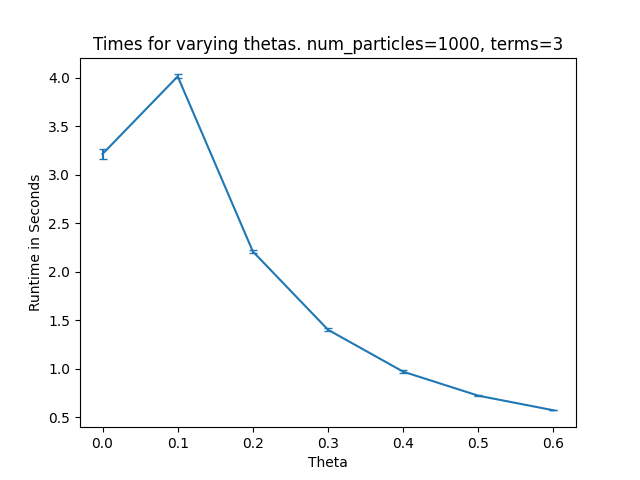

In [6]:
FILE_PATH = 'data/theta.npz'
fig = plots.theta(FILE_PATH)